<a href="https://colab.research.google.com/github/zildj/CPE695-Applied-Machine-Learning/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 In this problem, we write a program to find the coefficients for a linear regression model
for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x. You need to

1) Plot the data (i.e., x-axis for 1
st column, y-axis for 2
nd column),

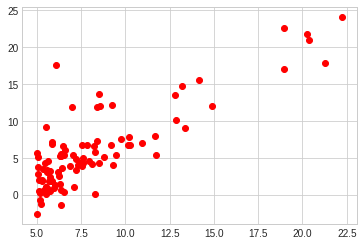

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-whitegrid')

f=np.split(pd.read_csv('data2.txt',header=None).values, 2, axis=1)
x=f[0]
y=f[1]
plt.plot(x,y, "ro")

and use Python to implement the following methods to find the coefficients:

2) Normal equation, and


Text(0.5, 1.0, 'Normal Equation')

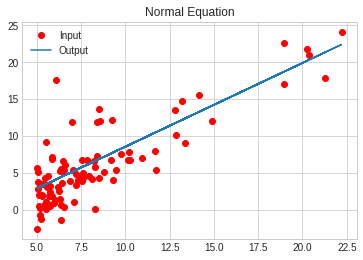

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-whitegrid')

f=np.split(pd.read_csv('data2.txt',header=None).values, 2, axis=1)
x=f[0]
y=f[1]
plt.plot(x,y, "ro", label='Input')
x = x.ravel()
y = y.ravel()
i=np.identity(2)
xm=np.full([x.size,1],1)
xm=np.insert(xm,0,values=np.power(x,1),axis=1)
w=np.dot(np.linalg.inv(4*i+np.dot(xm.T,xm)),np.dot(xm.T,y))
y1=np.polyval(w,x)
plt.plot(x,y1, label='Output')
plt.legend()
plt.title('Normal Equation')

3) Gradient Descent using **batch** mode:

a) Determine an appropriate termination condition (e.g., when cost function is less than a
threshold, and/or after a given number of iterations).

b) Print the cost function vs. iterations for each mode; compare and discuss batch and
stochastic modes in terms of the accuracy and the speed of convergence.

c) Choose a best learning rate. For example, you can plot cost function vs. learning rate to
determine the best learning rate.
Please implement the algorithms by yoursef and do NOT use the fit() function of the library. 

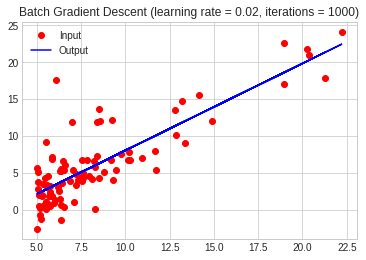

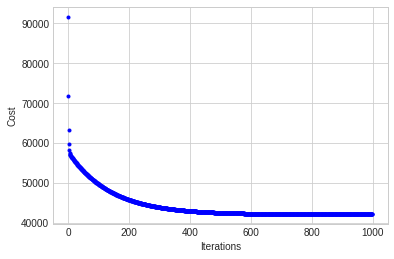

In [53]:
#@title Variables { run: "auto", form-width: "25%" }
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-whitegrid')

f=np.split(pd.read_csv('data2.txt',header=None).values, 2, axis=1)
x=f[0]
y=f[1]
plt.plot(x,y, "ro", label='Input')

def batch(x,y,theta,learningRate,iterations):
    cost_history = np.zeros(iterations)
    for itr in range(iterations):
        pred = np.dot(x,theta)
        theta = theta -(1/len(y))*learningRate*( x.T.dot((pred - y)))
        cost_history[itr]  = (1/2*len(y)) * np.sum(np.square(x.dot(theta)-y))
    return theta, cost_history

learningRate = .02 #@param {type:"number"}
iterations = 1000 #@param {type:"number"}
theta = np.random.randn(2,1)

x1 = np.c_[np.ones((len(x),1)),x]
theta,cost_history, = batch(x1,y,theta,learningRate,iterations)
pred = x1.dot(theta)

plt.plot(x,pred,'b-', label='Output')
plt.legend()
plt.title(f'Batch Gradient Descent (learning rate = {learningRate}, iterations = {iterations})')

plt.figure(2)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(iterations),cost_history,'b.')


3) Gradient Descent using **stochastic** mode:

a) Determine an appropriate termination condition (e.g., when cost function is less than a
threshold, and/or after a given number of iterations).

b) Print the cost function vs. iterations for each mode; compare and discuss batch and
stochastic modes in terms of the accuracy and the speed of convergence.

c) Choose a best learning rate. For example, you can plot cost function vs. learning rate to
determine the best learning rate.
Please implement the algorithms by yoursef and do NOT use the fit() function of the library. 

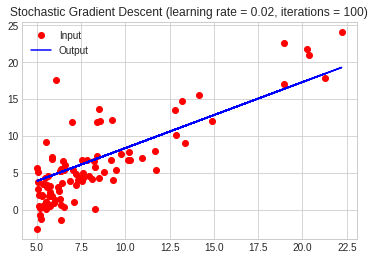

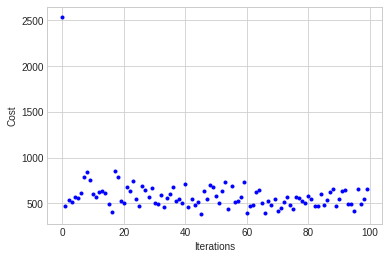

In [81]:
#@title Variables { form-width: "25%" }
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-whitegrid')

f=np.split(pd.read_csv('data2.txt',header=None).values, 2, axis=1)
x=f[0]
y=f[1]
plt.plot(x,y, "ro", label='Input')

def stocashtic(X,y,theta,learning_rate,iterations):
    cost_history = np.zeros(iterations)
    for itr in range(iterations):
        cost=0
        for i in range(len(y)):
            rand = np.random.randint(0,len(y))
            x1 = X[rand,:].reshape(1,X.shape[1])
            y1 = y[rand].reshape(1,1)
            prediction = np.dot(x1,theta)

            theta += -(1/len(y))*learning_rate*( x1.T.dot((prediction - y1)))
            cost += (1/2*len(y1)) * np.sum(np.square(x1.dot(theta)-y1))
        cost_history[itr]  = cost
    return theta, cost_history

learningRate = .02 #@param {type:"number"}
iterations =  100#@param {type:"number"}
theta = np.random.randn(2,1)

x1 = np.c_[np.ones((len(x),1)),x]
theta,cost_history, = stocashtic(x1,y,theta,learningRate,iterations)
pred = x1.dot(theta)

plt.plot(x,pred,'b-', label='Output')
plt.legend()
plt.title(f'Stochastic Gradient Descent (learning rate = {learningRate}, iterations = {iterations})')

plt.figure(2)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(iterations),cost_history,'b.')


After inputting many different learning rates to the batch and stochastic gradient decent methods, I have found that a learning rate of 0.02 works great with both methods. The batch method’s cost evens out around 500 iterations. The stochastic methods can reach this plateau in under 100 iterations. Even though the stochastic method is faster on average, it is less reliable and consistent than the batch method from my testing. 